In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/final_data_model2.csv', index_col=['user_id','book_id'])
data.head()

rating  user_avg_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791       5              5.0   
0005a08accd53b1e19c52109a1f478cb 59960          0              3.4   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194       5              5.0   
0008931c0cde961e9c802c5a58196d23 500503         5              5.0   
                                 6081685        5              5.0   

                                           book_cluster  \
user_id                          book_id                  
000192962b87d560f00b06fdcbd71681 30025791           0.0   
0005a08accd53b1e19c52109a1f478cb 59960              2.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194           0.0   
0008931c0cde961e9c802c5a58196d23 500503             1.0   
                                 6081685            1.0   

                                           user_avg_rating_by_cluster  \
user_id                          book_id                                
000192962b87d560f00b06fdcbd71681 30025791                         5.0   
0005a08accd53b1e19c52109a1f478cb 59960                            0.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                         5.0   
0008931c0cde961e9c802c5a58196d23 500503                           5.0   
                                 6081685                          5.0   

                                          review_sentiment  book_avg_rating  \
user_id                          book_id                                      
000192962b87d560f00b06fdcbd71681 30025791         positive             4.19   
0005a08accd53b1e19c52109a1f478cb 59960            positive             4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194         negative             4.04   
0008931c0cde961e9c802c5a58196d23 500503           positive             4.29   
                                 6081685          positive             4.40   

                                           most_similar_book_rating  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                      4.32   
0005a08accd53b1e19c52109a1f478cb 59960                         4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                      3.79   
0008931c0cde961e9c802c5a58196d23 500503                        4.42   
                                 6081685                       4.53   

                                           2nd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.58   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     4.33   
0008931c0cde961e9c802c5a58196d23 500503                       4.43   
                                 6081685                      4.48   

                                           3rd_similar_book_rating  
user_id                          book_id                            
000192962b87d560f00b06fdcbd71681 30025791                     4.20  
0005a08accd53b1e19c52109a1f478cb 59960                        4.25  
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     3.79  
0008931c0cde961e9c802c5a58196d23 500503                       4.40  
                                 6081685                      4.50

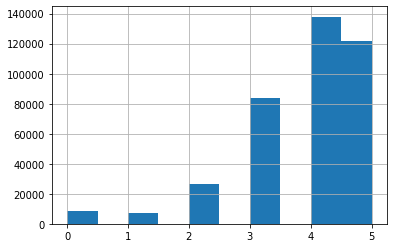

In [3]:
data.rating.hist()

In [4]:
display(data.groupby('rating')['user_avg_rating'].count())
display(len(data))

rating
0      8802
1      7163
2     26482
3     83554
4    137939
5    121812
Name: user_avg_rating, dtype: int64

385752

In [10]:
# Get percentage of values by rating
data.rating.value_counts(normalize=True)*100

4    35.758467
5    31.577801
3    21.660030
2     6.865032
0     2.281777
1     1.856893
Name: rating, dtype: float64

In [11]:
# Create dummies for the sentiment categories
data = pd.get_dummies(data)
data.head()

rating  user_avg_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791       5              5.0   
0005a08accd53b1e19c52109a1f478cb 59960          0              3.4   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194       5              5.0   
0008931c0cde961e9c802c5a58196d23 500503         5              5.0   
                                 6081685        5              5.0   

                                           book_cluster  \
user_id                          book_id                  
000192962b87d560f00b06fdcbd71681 30025791           0.0   
0005a08accd53b1e19c52109a1f478cb 59960              2.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194           0.0   
0008931c0cde961e9c802c5a58196d23 500503             1.0   
                                 6081685            1.0   

                                           user_avg_rating_by_cluster  \
user_id                          book_id                                
000192962b87d560f00b06fdcbd71681 30025791                         5.0   
0005a08accd53b1e19c52109a1f478cb 59960                            0.0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                         5.0   
0008931c0cde961e9c802c5a58196d23 500503                           5.0   
                                 6081685                          5.0   

                                           book_avg_rating  \
user_id                          book_id                     
000192962b87d560f00b06fdcbd71681 30025791             4.19   
0005a08accd53b1e19c52109a1f478cb 59960                4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194             4.04   
0008931c0cde961e9c802c5a58196d23 500503               4.29   
                                 6081685              4.40   

                                           most_similar_book_rating  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                      4.32   
0005a08accd53b1e19c52109a1f478cb 59960                         4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                      3.79   
0008931c0cde961e9c802c5a58196d23 500503                        4.42   
                                 6081685                       4.53   

                                           2nd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.58   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     4.33   
0008931c0cde961e9c802c5a58196d23 500503                       4.43   
                                 6081685                      4.48   

                                           3rd_similar_book_rating  \
user_id                          book_id                             
000192962b87d560f00b06fdcbd71681 30025791                     4.20   
0005a08accd53b1e19c52109a1f478cb 59960                        4.25   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                     3.79   
0008931c0cde961e9c802c5a58196d23 500503                       4.40   
                                 6081685                      4.50   

                                           review_sentiment_negative  \
user_id                          book_id                               
000192962b87d560f00b06fdcbd71681 30025791                          0   
0005a08accd53b1e19c52109a1f478cb 59960                             0   
000700ecd5db3a9b0c4e392ed2e4f70b 11790194                          1   
0008931c0cde961e9c802c5a58196d23 500503                            0   
                                 6081685                           0   

                                           review_sentiment_neutral  \
user_id                          book_id                              
000192962b87d560f00b06fdcbd71681 30025791                       

In [12]:
from sklearn.preprocessing import StandardScaler

# Define X,y
X = data.drop('rating', axis=1)
y = data.rating

# Preprocessing
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [13]:
# Split into training/testing sets
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 2)

# Model 1: KNN

First I'll use KNN as a base model. Will compare this model results to those of the base KNN without the additional features

In [14]:
# First will just run it "out of the box"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn = KNeighborsClassifier()
model_1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.52
Precision: 0.48
Recall: 0.44
F1 Score: 0.45


In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5]))

[[ 1250    68   214   350   233    65]
 [   80   355   450   632   267    28]
 [  130   341  1731  2704  1573   207]
 [  150   343  1939  9464  7621  1395]
 [  121   149  1124  8025 19043  5836]
 [   71    34   319  2858  9341 17927]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.69      0.57      0.63      2180
           1       0.28      0.20      0.23      1812
           2       0.30      0.26      0.28      6686
           3       0.39      0.45      0.42     20912
           4       0.50      0.56      0.53     34298
           5       0.70      0.59      0.64     30550

    accuracy                           0.52     96438
   macro avg       0.48      0.44      0.45     96438
weighted avg       0.53      0.52      0.52     96438



In [29]:
# KNN parameter tuning
from sklearn.model_selection import GridSearchCV

# Grid of parameters to test over
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]

param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gs = GridSearchCV(knn, param_grid, verbose=1, cv=5)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

KeyboardInterrupt: 

# Model 2: Decision Tree

Let's try decision tree algorithm.

In [10]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(criterion='gini',max_depth=3)

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

In [11]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.53
Precision: 0.44
Recall: 0.38
F1 Score: 0.39


C:\Users\mdurr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 3: Random Forest

Lastly, random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_3 = rfc.fit(X_train, y_train)
y_pred = model_3.predict(X_test)

In [13]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='macro')))

Accuracy: 0.55
Precision: 0.55
Recall: 0.46
F1 Score: 0.49
